<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/DeTrender_(Linear%2C_Seasonal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests

In [95]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving 7_6_23 - Vader + Volatility - Final (5).csv to 7_6_23 - Vader + Volatility - Final (5) (8).csv


In [96]:
columns =    ["date", "compound","VCDAX_V", "VCSAX_V", "VENAX_V", "VFAIX_V", "VGSLX_V", "VGHCX_V", "VITAX_V", "VMAIX_V", "VSPVX_V", "VTCAX_V",
           "VUIAX_V", "VINAX_V", "VUIAX_P", "VGHCX_P", "VFAIX_P", "VSPVX_P", "VITAX_P", "VMIAX_P", "VGSLX_P", "VINAX_P",
           "VTCAX_P", "VCSAX_P", "VENAX_P", "VCDAX_P"]

columns_affected_V = ["VCSAX_V", "VGSLX_V","VITAX_V"]
columns_affected_P = ["VCSAX_P","VITAX_P","VUIAX_P"]
columns_affected_all = columns_affected_P + columns_affected_V

data = df[columns].dropna()
data["date"] = pd.to_datetime(data["date"])
date = data.set_index('date', inplace = True)

data_affected = data[columns_affected_all]
data_detrended = pd.DataFrame(index=data_affected.index)

In [97]:
def detrend_linear (column):
  x = np.arange(len(column))
  y = column.values.reshape(-1,1)

  regressor = LinearRegression()
  regressor.fit(x.reshape(-1, 1), y)

  trend = regressor.predict(x.reshape(-1,1))
  column_detrended = column - trend.flatten()

  return column_detrended

In [ ]:
for column in data_affected:
    detrended_column = detrend_linear(data_affected[column])
    data_detrended[column + '_detrended'] = detrended_column

    plt.figure(figsize=(10, 6))
    plt.plot(data_affected[column], label='Original')
    plt.plot(detrended_column, label='Detrended')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} and its Detrended Version')
    plt.legend()
    plt.show()

print(data_affected)
print(data_detrended)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

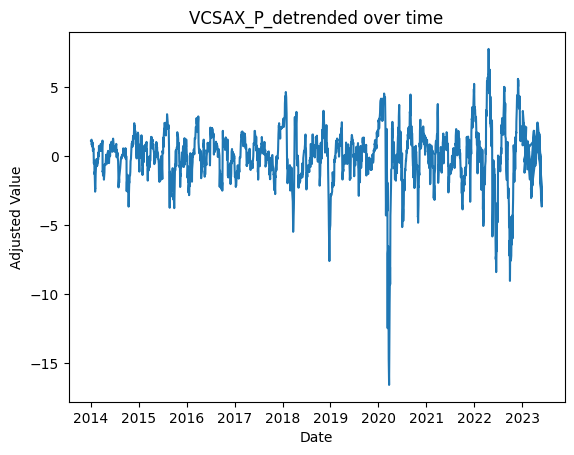

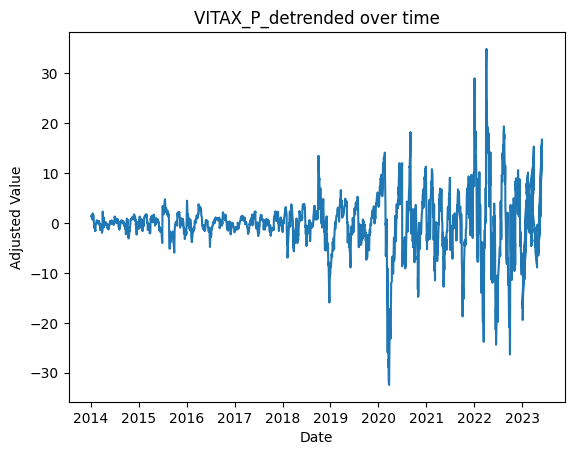

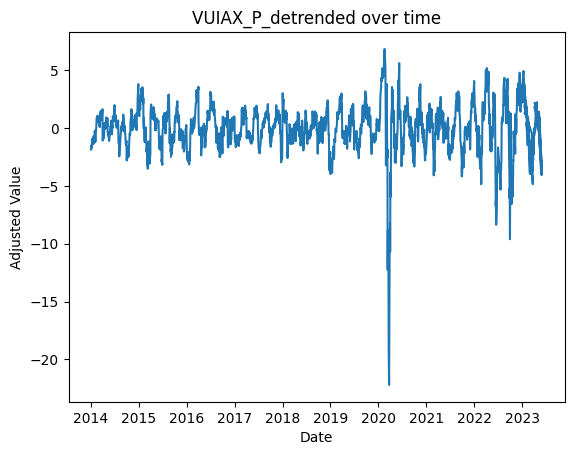

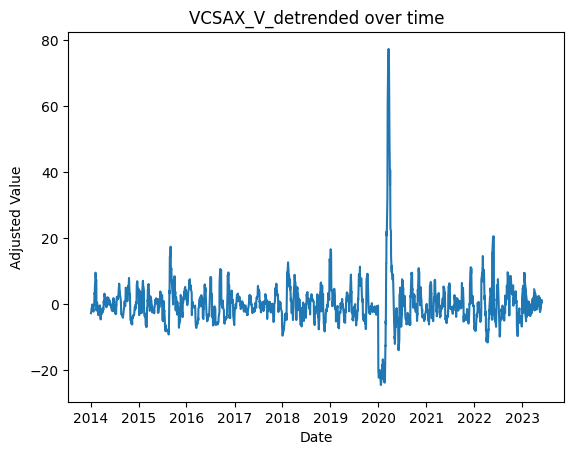

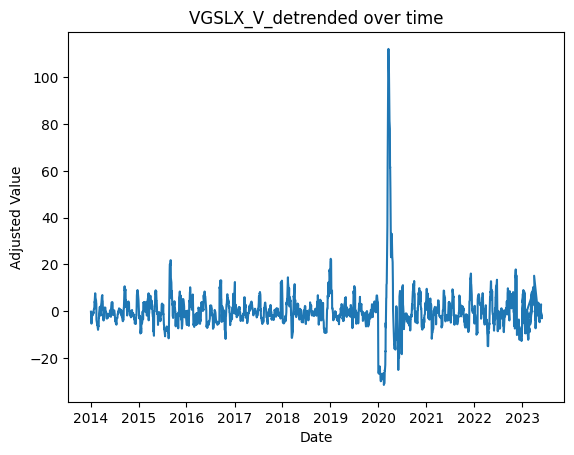

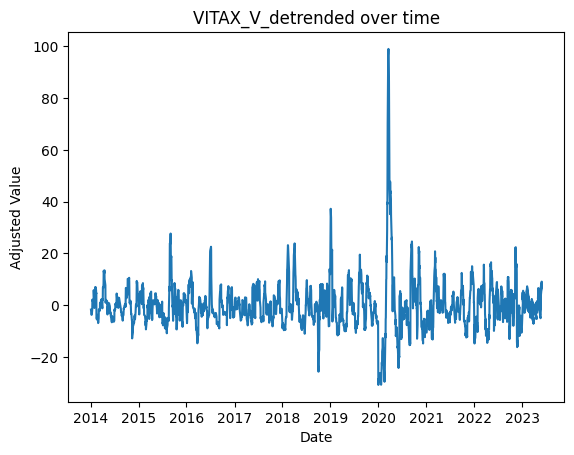

In [107]:
data_seasonal = data_detrended

season_mapping = {
    1: 'winter',
    2: 'winter',
    3: 'winter',
    4: 'spring',
    5: 'spring',
    6: 'spring',
    7: 'summer',
    8: 'summer',
    9: 'summer',
    10: 'fall',
    11: 'fall',
    12: 'fall'
}


detrend_seasonal = lambda column: column - data_seasonal.groupby(['year', 'season'])[column.name].transform('mean')

columns_to_detrend = data_seasonal.columns.difference(['date', 'season', 'year'])
data_seasonal[columns_to_detrend] = data_seasonal[columns_to_detrend].apply(detrend_seasonal)

data_seasonal.to_csv('detrended_final.csv', index=True)
files.download('detrended_final.csv')

for column in data_seasonal.columns:
    if column not in ['season', 'year']:
        plt.figure()
        plt.plot(data_seasonal.index, data_seasonal[column])
        plt.title(f'{column} over time')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Value')
        plt.show()
